In [704]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [705]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AMZN','AAPL', 'TSLA','KO', 'JNJ', 'WM', 'SBUX', 'KR', 'BA', 'DAL', 'UPS', 'O', 'DIS', 'PFE', 'SPHD']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [706]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2012-10-26 to 2020-08-19
Data columns (total 15 columns):
AMZN    1965 non-null float64
AAPL    1965 non-null float64
TSLA    1965 non-null float64
KO      1965 non-null float64
JNJ     1965 non-null float64
WM      1965 non-null float64
SBUX    1965 non-null float64
KR      1965 non-null float64
BA      1965 non-null float64
DAL     1965 non-null float64
UPS     1965 non-null float64
O       1965 non-null float64
DIS     1965 non-null float64
PFE     1965 non-null float64
SPHD    1965 non-null float64
dtypes: float64(15)
memory usage: 245.6 KB


In [707]:
historical_data.head()

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
Date,,,,,,,,,,,,,,,
2012-10-26,238.240005,74.883018,27.379999,28.978256,57.090889,26.443447,20.027771,10.501134,58.771404,8.562699,57.545650,27.655916,44.838810,19.099195,18.421980
2012-10-31,232.889999,73.806885,28.129999,29.087784,57.026478,26.605974,20.040874,10.517815,58.217651,8.553817,57.726906,27.523434,43.979282,18.678610,18.429333
2012-11-01,232.139999,73.958138,29.250000,29.205130,57.574028,26.817263,20.355236,10.426068,58.506905,8.615993,58.239155,27.726683,44.570206,18.438269,18.480808
2012-11-02,232.419998,71.510796,28.920000,29.009552,57.090889,26.142763,22.197777,10.396873,57.895321,8.615993,57.908169,27.656605,44.641834,18.438269,18.238123
2012-11-05,234.330002,72.480324,31.500000,28.767012,57.002293,26.232151,22.272003,10.396873,58.192860,8.678170,57.884521,27.530439,45.053696,18.460804,18.157230


In [708]:
historical_data.tail()

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
Date,,,,,,,,,,,,,,,
2020-08-13,3161.020020,460.040009,1621.000000,48.380001,148.000000,111.339996,79.019997,34.590000,174.729996,28.700001,159.289993,61.430000,130.960007,38.169998,34.639999
2020-08-14,3148.020020,459.630005,1650.709961,48.450001,148.240005,111.470001,78.370003,35.389999,178.080002,28.950001,160.740005,61.009998,130.529999,38.060001,34.759998
2020-08-17,3182.409912,458.429993,1835.640015,48.209999,148.990005,110.870003,78.949997,36.000000,172.009995,28.020000,160.300003,61.980000,129.369995,38.349998,34.610001
2020-08-18,3312.489990,462.250000,1887.089966,48.419998,150.089996,111.010002,78.989998,36.240002,170.229996,27.629999,159.990005,61.580002,128.919998,38.360001,34.389999
2020-08-19,3260.479980,462.829987,1878.530029,47.369999,150.389999,110.559998,77.629997,36.220001,169.270004,27.670000,160.339996,60.049999,127.769997,38.259998,34.270000


In [709]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2012-10-26 to 2020-08-19
Data columns (total 15 columns):
AMZN    1964 non-null float64
AAPL    1964 non-null float64
TSLA    1964 non-null float64
KO      1964 non-null float64
JNJ     1964 non-null float64
WM      1964 non-null float64
SBUX    1964 non-null float64
KR      1964 non-null float64
BA      1964 non-null float64
DAL     1964 non-null float64
UPS     1964 non-null float64
O       1964 non-null float64
DIS     1964 non-null float64
PFE     1964 non-null float64
SPHD    1964 non-null float64
dtypes: float64(15)
memory usage: 245.6 KB


In [710]:
returns.head()

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
Date,,,,,,,,,,,,,,,
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-31,-0.022712,-0.014475,0.027024,0.003773,-0.001129,0.006127,0.000654,0.001587,-0.009467,-0.001038,0.003145,-0.004802,-0.019355,-0.022267,0.000399
2012-11-01,-0.003226,0.002047,0.039043,0.004026,0.009556,0.007910,0.015564,-0.008761,0.004956,0.007242,0.008835,0.007357,0.013347,-0.012951,0.002789
2012-11-02,0.001205,-0.033651,-0.011346,-0.006719,-0.008427,-0.025473,0.086654,-0.002804,-0.010508,0.000000,-0.005699,-0.002531,0.001606,0.000000,-0.013219
2012-11-05,0.008184,0.013467,0.085454,-0.008396,-0.001553,0.003413,0.003338,0.000000,0.005126,0.007191,-0.000408,-0.004572,0.009184,0.001221,-0.004445


In [711]:
returns.tail()

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
Date,,,,,,,,,,,,,,,
2020-08-13,-0.000386,0.017543,0.041722,-0.001033,-0.011154,-0.008140,-0.003411,0.004636,-0.004055,-0.013497,0.009461,-0.025236,-0.006318,-0.004183,-0.011481
2020-08-14,-0.004121,-0.000892,0.018162,0.001446,0.001620,0.001167,-0.008260,0.022865,0.018991,0.008673,0.009062,-0.006861,-0.003289,-0.002886,0.003458
2020-08-17,0.010865,-0.002614,0.106188,-0.004966,0.005047,-0.005397,0.007373,0.017090,-0.034680,-0.032652,-0.002741,0.015774,-0.008927,0.007591,-0.004325
2020-08-18,0.040061,0.008298,0.027643,0.004346,0.007356,0.001262,0.000507,0.006645,-0.010402,-0.014016,-0.001936,-0.006475,-0.003484,0.000261,-0.006377
2020-08-19,-0.015826,0.001254,-0.004546,-0.021924,0.001997,-0.004062,-0.017367,-0.000552,-0.005655,0.001447,0.002185,-0.025160,-0.008960,-0.002610,-0.003495


In [712]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.1 , 28.14, 53.83, 18.01, 17.89, 18.12, 24.81, 27.07, 37.13,
       39.37, 22.01, 27.64, 23.95, 20.04, 17.19])

In [713]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.13,1.90,33.30,30.10
1,AAPL,0.09,1.78,23.19,28.14
2,TSLA,0.22,3.40,53.82,53.83
3,KO,0.03,1.14,6.26,18.01
4,JNJ,0.05,1.13,12.33,17.89
5,WM,0.07,1.15,18.21,18.12
6,SBUX,0.07,1.57,17.25,24.81
7,KR,0.06,1.71,15.76,27.07
8,BA,0.05,2.35,13.47,37.13
9,DAL,0.06,2.49,14.93,39.37


In [714]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN   2014-01-31
AAPL   2020-03-16
TSLA   2020-03-16
KO     2020-03-12
JNJ    2018-12-14
WM     2020-03-12
SBUX   2020-03-16
KR     2017-06-15
BA     2020-03-16
DAL    2020-03-18
UPS    2015-01-23
O      2020-03-16
DIS    2020-03-12
PFE    2020-03-16
SPHD   2020-03-16
dtype: datetime64[ns]

In [715]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN   2015-04-24
AAPL   2020-03-13
TSLA   2013-05-09
KO     2020-04-06
JNJ    2020-03-30
WM     2020-03-17
SBUX   2020-03-24
KR     2019-11-05
BA     2020-03-25
DAL    2020-03-24
UPS    2020-07-30
O      2020-03-24
DIS    2020-03-24
PFE    2020-03-13
SPHD   2020-03-24
dtype: datetime64[ns]

In [716]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
AMZN,0.000362,0.000147,0.000214,0.000053,0.000069,0.000062,0.000124,0.000057,0.000124,0.000112,0.000091,0.000062,0.000104,0.000074,0.000071
AAPL,0.000147,0.000317,0.000181,0.000070,0.000075,0.000077,0.000121,0.000050,0.000164,0.000145,0.000100,0.000085,0.000115,0.000080,0.000096
TSLA,0.000214,0.000181,0.001159,0.000080,0.000067,0.000069,0.000156,0.000061,0.000206,0.000209,0.000088,0.000155,0.000154,0.000077,0.000113
KO,0.000053,0.000070,0.000080,0.000130,0.000066,0.000074,0.000082,0.000038,0.000121,0.000112,0.000064,0.000092,0.000082,0.000067,0.000086
JNJ,0.000069,0.000075,0.000067,0.000066,0.000128,0.000067,0.000077,0.000052,0.000099,0.000079,0.000070,0.000062,0.000071,0.000085,0.000073
WM,0.000062,0.000077,0.000069,0.000074,0.000067,0.000131,0.000086,0.000040,0.000112,0.000108,0.000074,0.000097,0.000079,0.000066,0.000086
SBUX,0.000124,0.000121,0.000156,0.000082,0.000077,0.000086,0.000246,0.000057,0.000178,0.000175,0.000087,0.000127,0.000133,0.000080,0.000105
KR,0.000057,0.000050,0.000061,0.000038,0.000052,0.000040,0.000057,0.000293,0.000037,0.000051,0.000061,0.000025,0.000049,0.000053,0.000048
BA,0.000124,0.000164,0.000206,0.000121,0.000099,0.000112,0.000178,0.000037,0.000552,0.000342,0.000123,0.000185,0.000182,0.000105,0.000168
DAL,0.000112,0.000145,0.000209,0.000112,0.000079,0.000108,0.000175,0.000051,0.000342,0.000620,0.000115,0.000165,0.000183,0.000099,0.000153


In [717]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
AMZN,0.090574,0.036678,0.053513,0.013272,0.017258,0.015449,0.031101,0.014307,0.030943,0.028058,0.022817,0.015496,0.025914,0.018394,0.017661
AAPL,0.036678,0.079168,0.045156,0.017506,0.018834,0.019258,0.030174,0.012590,0.041104,0.036243,0.024877,0.021305,0.028685,0.019918,0.024108
TSLA,0.053513,0.045156,0.289747,0.020101,0.016847,0.017227,0.038949,0.015281,0.051601,0.052363,0.021884,0.038671,0.038586,0.019191,0.028200
KO,0.013272,0.017506,0.020101,0.032421,0.016435,0.018390,0.020540,0.009396,0.030280,0.028103,0.016025,0.023034,0.020564,0.016641,0.021582
JNJ,0.017258,0.018834,0.016847,0.016435,0.032003,0.016712,0.019190,0.013113,0.024813,0.019823,0.017459,0.015574,0.017739,0.021254,0.018190
WM,0.015449,0.019258,0.017227,0.018390,0.016712,0.032842,0.021613,0.009969,0.028041,0.026978,0.018558,0.024341,0.019741,0.016608,0.021429
SBUX,0.031101,0.030174,0.038949,0.020540,0.019190,0.021613,0.061542,0.014236,0.044482,0.043800,0.021669,0.031798,0.033142,0.019920,0.026290
KR,0.014307,0.012590,0.015281,0.009396,0.013113,0.009969,0.014236,0.073275,0.009289,0.012687,0.015228,0.006251,0.012362,0.013164,0.011878
BA,0.030943,0.041104,0.051601,0.030280,0.024813,0.028041,0.044482,0.009289,0.137899,0.085466,0.030706,0.046137,0.045531,0.026251,0.041903
DAL,0.028058,0.036243,0.052363,0.028103,0.019823,0.026978,0.043800,0.012687,0.085466,0.155006,0.028753,0.041371,0.045797,0.024797,0.038316


In [718]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,KO,JNJ,WM,SBUX,KR,BA,DAL,UPS,O,DIS,PFE,SPHD
AMZN,1.000000,0.433135,0.330327,0.244921,0.320546,0.283254,0.416574,0.175612,0.276870,0.236795,0.344428,0.186255,0.359502,0.304931,0.341313
AAPL,0.433135,1.000000,0.298147,0.345535,0.374165,0.377682,0.432288,0.165305,0.393397,0.327173,0.401668,0.273903,0.425648,0.353173,0.498341
TSLA,0.330327,0.298147,1.000000,0.207393,0.174953,0.176602,0.291679,0.104876,0.258148,0.247081,0.184699,0.259881,0.299291,0.177876,0.304709
KO,0.244921,0.345535,0.207393,1.000000,0.510234,0.563567,0.459845,0.192773,0.452856,0.396432,0.404333,0.462748,0.476840,0.461093,0.697144
JNJ,0.320546,0.374165,0.174953,0.510234,1.000000,0.515500,0.432408,0.270784,0.373515,0.281443,0.443375,0.314925,0.414000,0.592743,0.591390
WM,0.283254,0.377682,0.176602,0.563567,0.515500,1.000000,0.480735,0.203207,0.416682,0.378117,0.465220,0.485865,0.454804,0.457225,0.687737
SBUX,0.416574,0.432288,0.291679,0.459845,0.432408,0.480735,1.000000,0.211987,0.482858,0.448449,0.396821,0.463670,0.557784,0.400616,0.616390
KR,0.175612,0.165305,0.104876,0.192773,0.270784,0.203207,0.211987,1.000000,0.092407,0.119046,0.255577,0.083530,0.190667,0.242624,0.255220
BA,0.276870,0.393397,0.258148,0.452856,0.373515,0.416682,0.482858,0.092407,1.000000,0.584569,0.375648,0.449432,0.511921,0.352691,0.656312
DAL,0.236795,0.327173,0.247081,0.396432,0.281443,0.378117,0.448449,0.119046,0.584569,1.000000,0.331778,0.380121,0.485671,0.314226,0.566039


In [719]:
no_assets = len(tickers)

In [720]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(50000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

0.9999999999999998


In [721]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [722]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.190712,0.182407
1,0.154049,0.165673
2,0.164130,0.169121
3,0.167560,0.166233
4,0.188259,0.167378


In [723]:
pflio_scenarios.tail()

,Return,Volatility
49995,0.207396,0.182637
49996,0.186594,0.177079
49997,0.174743,0.174642
49998,0.185585,0.171872
49999,0.175773,0.174462


In [724]:
for i in range(50000):
    if pflio_scenarios['Return'][i] >= 0.24 and pflio_scenarios['Volatility'][i] <= 0.19:
        print(pflio_scenarios.iloc[i])

Return        0.240026
Volatility    0.185338
Name: 11037, dtype: float64


In [734]:
index = 11037
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

weights_df = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.240026
Volatility    0.185338
Name: 11037, dtype: float64


,Symbol,Weights
2,TSLA,0.174458
5,WM,0.169096
0,AMZN,0.137189
6,SBUX,0.090115
3,KO,0.087308
1,AAPL,0.064276
11,O,0.063157
7,KR,0.050226
10,UPS,0.050195
13,PFE,0.039792


In [735]:
# Calculate Weighted Returns 
weights = np.array([pflio_wei2])
weighted_returns = ( weights * returns)

In [736]:
pflio_wei2

array([0.13718934, 0.06427634, 0.17445807, 0.08730756, 0.03699132,
       0.16909637, 0.09011475, 0.05022616, 0.0041974 , 0.01299004,
       0.0501954 , 0.06315717, 0.01616169, 0.03979202, 0.00384638])

In [760]:
capital = 16000
price = []
for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price})
ideal_portfolio = pd.concat([tickers_df, price_portfolio, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

,Symbol,Price,Weights
2,TSLA,2791.33,0.174458
5,WM,2705.54,0.169096
0,AMZN,2195.03,0.137189
6,SBUX,1441.84,0.090115
3,KO,1396.92,0.087308
1,AAPL,1028.42,0.064276
11,O,1010.51,0.063157
7,KR,803.62,0.050226
10,UPS,803.13,0.050195
13,PFE,636.67,0.039792


In [761]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*252, pflio_wei2)))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers_df)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(tickers_df)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.009596165588729829
Portfolio Return (252 days) 0.2418233728359917
Portfolio Return (756 days) 0.7254701185079752

Portfolio Volatility (10 days) 0.03706753965283816
Portfolio Volatility (252 days) 0.18607757225697885
Portfolio Volatility (756 days) 0.3222958092981563

Diversifiable Risk: 31.0 %

Non-Diversifiable Risk: 1.3299999999999998 %
Non-Diversifiable Risk: False


Text(0, 0.5, 'Expected Return')

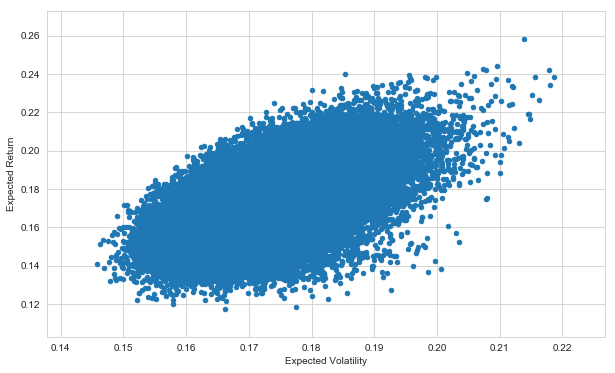

In [730]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

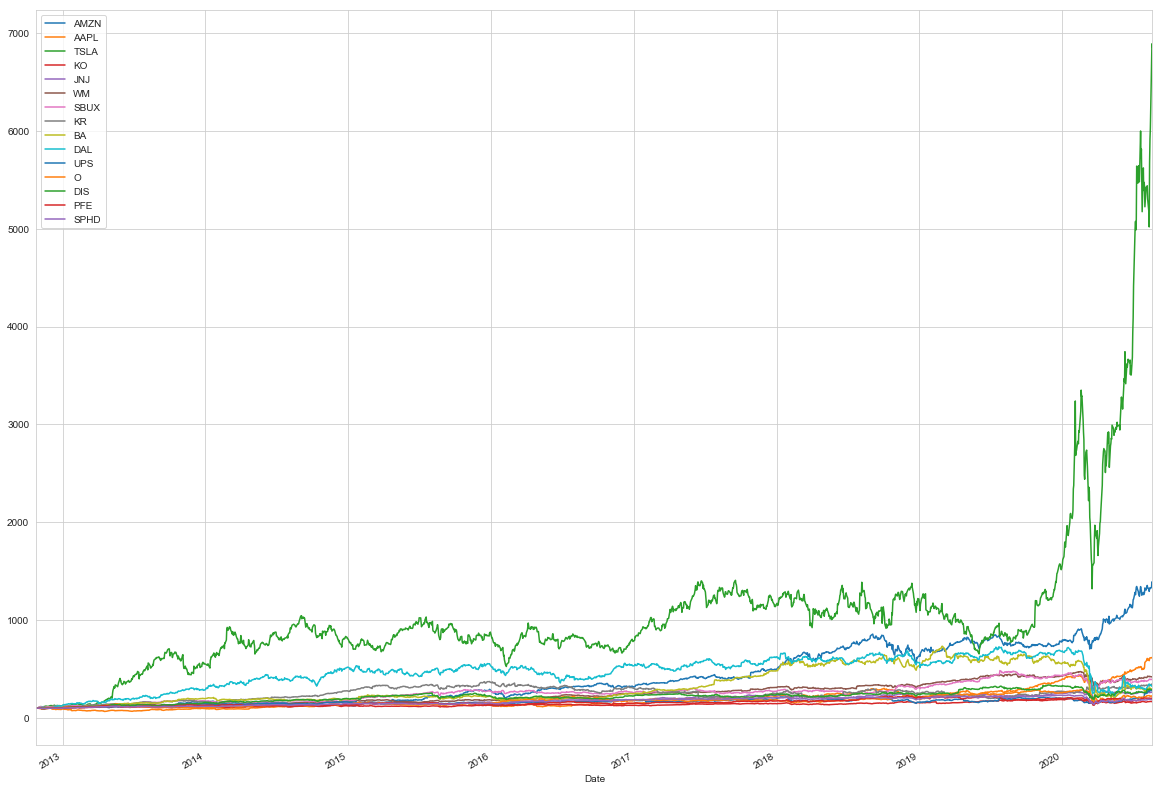

In [731]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

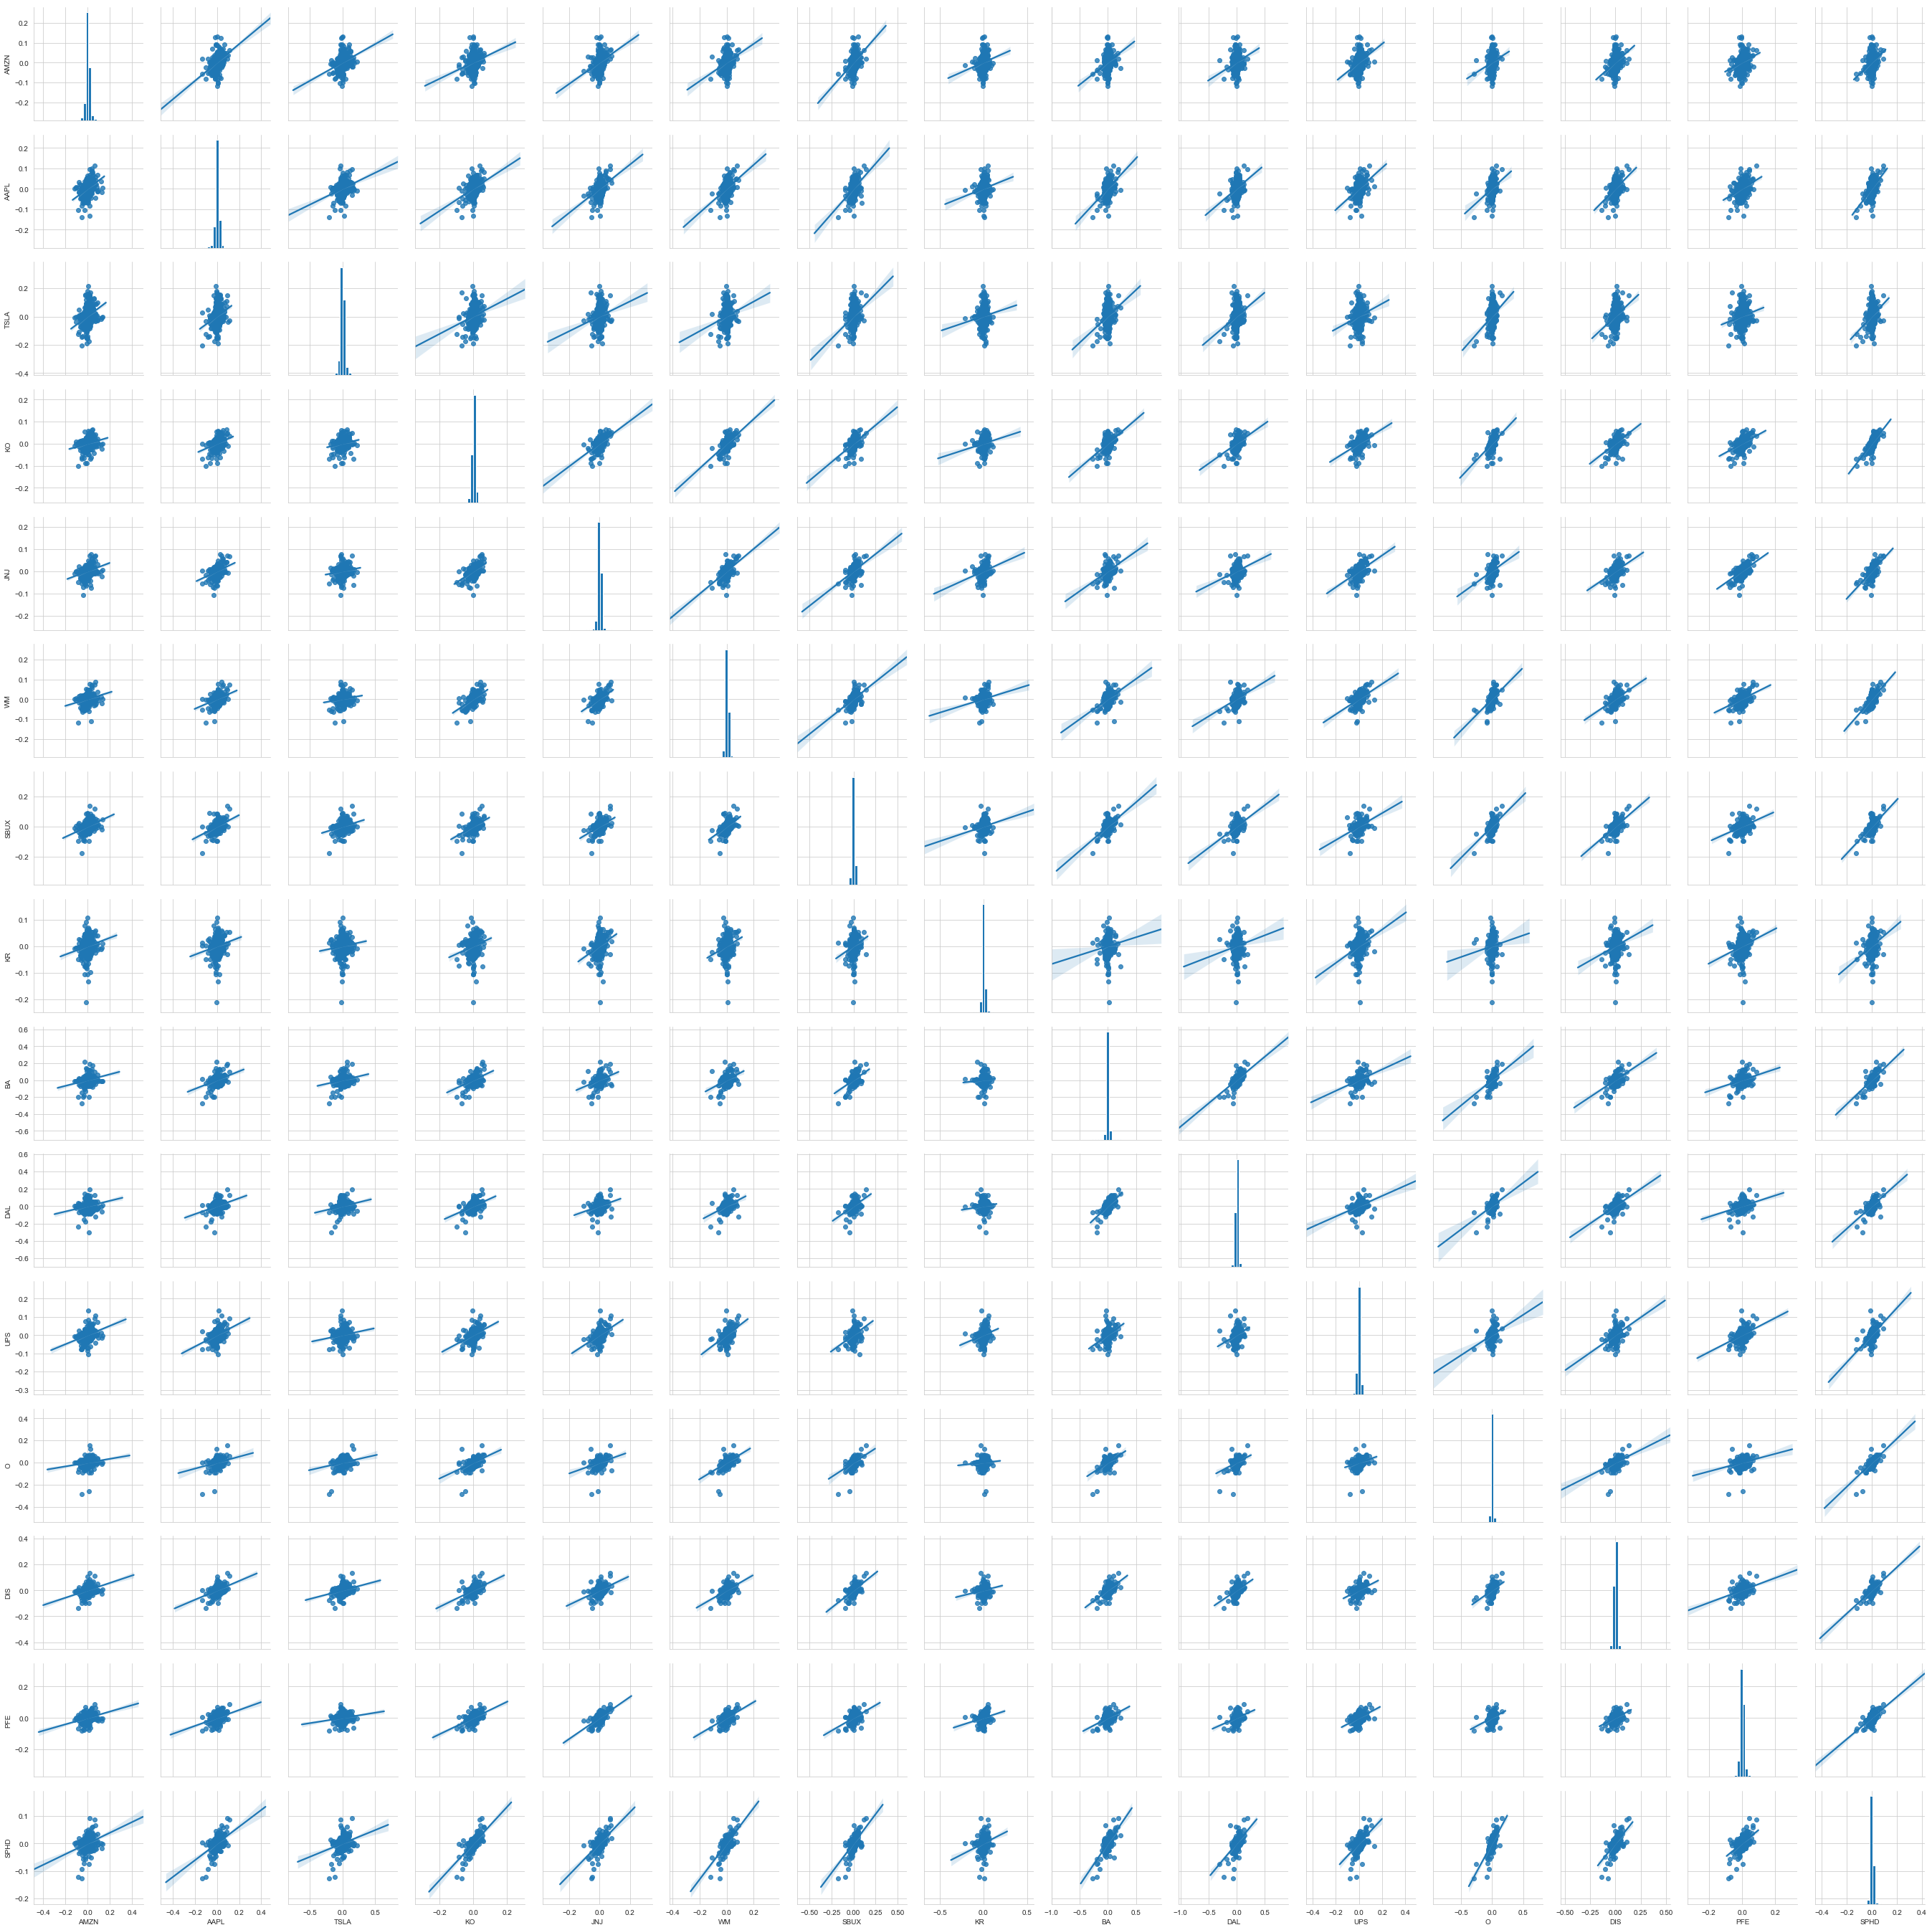

In [732]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

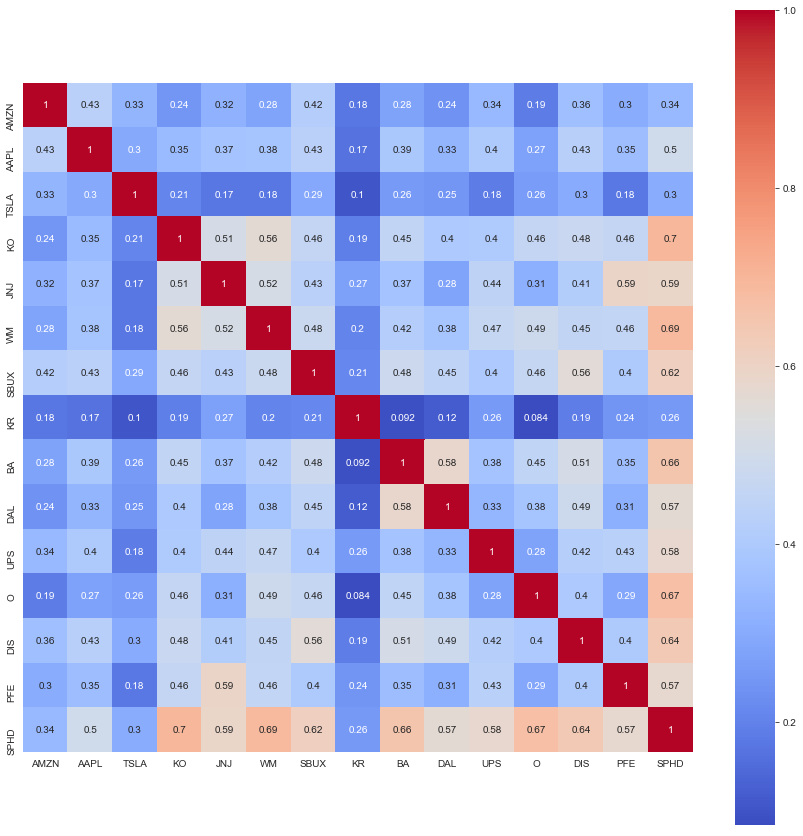

In [733]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap


## Notes

- Sell all JD after BABA earning calls (August 20)
- Sell 6% of BABA shares after earning calls (August 20)
- Re-run what happens after TSLA stock split 
- Re-run what happens after AAPL stock split
- Buy 8% JNJ shares